In [6]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---
## Instructions

* Questions 1-3 (6+12+12=30 points total) are about classification.
* Question 4 (6\*10=60 points total) is a coding question.
* Question 5 (10 points) is about randomized experiments.


* Fill in the code and markdown cells. Please don't change the order of the questions, or move the question cells.
* Feel free to add code and markdown cells if you need them.
* If you need the results of a previous question, use it in your code and say so in the description. This helps us in grading, even if your answer for the previous question was not correct.
* **KEEP SAVING YOUR WORK**
* Submit to Canvas at the end.

---
## Q1 (6 points) Compare classification methods

Consider a training dataset with two categorical features, with four categories per feature (called `A`, `B`, `C`, and `D`), and the following 8 training examples.

![NB.png](NB.png)


Will Naive Bayes work well for classification on such a dataset? Give your answer and a short reason.

No, since both prior distribution and conditional distribution for two features are equally spread out. For example, let's look at the point(A,A), the score for positive is the same as score for negative, which means we don't need to use naive bayes for prediction, we could rather just guess it with 50% positive and 50% negative.

---
## Q2 (3 parts, 4 points each) Classification continued
Consider the following dataset, this time with numerical features.

![DT.png](DT.png)

### Q2(a) Can decision trees be used to classify the data well? Give your answer and a short reason.

### Q2(b)  How well will logistic regression work on this dataset? Give your answer and a short reason.

### Q2(c) How well will K-Nearest Neighbors work on this dataset? Give your answer and a short reason.

---
## Q3 (3 parts, 4 points each) More Classification

Consider the following dataset.
![lattice.png](lattice.png)

### Q3(a) How well will decision trees work on this dataset? Give your answer and a short reason.

### Q3(b) How well will logistic regression work on this dataset? Give your answer and a short reason.

### Q3(c) How well will K-Nearest Neighbors (with k=6) work on this dataset? Give your answer and a short reason.

## Q4 (10 parts, 6 points each) Nutrients in food

We will analyze the nutrient value of various foods, using data provided by the USDA. We will use two files:

* FoodDescriptions.csv, containing the following information for each type of food:
    * a unique ID for each type of food (called FoodId)
    * a category number (called FoodGroup) for the general category for this type of food
    * a description of the food item (LongDesc)
    * three nutrient factors (ProFactor, FatFactor, CHOfactor)
* FoodGroups.csv, containing the following information for each category of foods:
    * the FoodGroup category number
    * the name of the category (FoodGroupDesc)

### Q4(a): Create a combined table

Create a table, called `combined`, that contains all information about each food, along with the `FoodGroupDesc` field for the category of that food item.

In [7]:
description = pd.read_csv('/Users/meganchen/final/FoodDescriptions.csv')
group = pd.read_csv('/Users/meganchen/final/FoodGroups.csv')
combined = description.merge(group, on = 'FoodGroup')
combined.iloc[:10,]

,FoodId,FoodGroup,LongDesc,ProFactor,FatFactor,CHOfactor,FoodGroupDesc
0,1001,100,"Butter, salted",4.27,8.79,3.87,Dairy and Egg Products
1,1002,100,"Butter, whipped, with salt",NaN,NaN,NaN,Dairy and Egg Products
2,1003,100,"Butter oil, anhydrous",4.27,8.79,3.87,Dairy and Egg Products
3,1004,100,"Cheese, blue",4.27,8.79,3.87,Dairy and Egg Products
4,1005,100,"Cheese, brick",4.27,8.79,3.87,Dairy and Egg Products
5,1006,100,"Cheese, brie",4.27,8.79,3.87,Dairy and Egg Products
6,1007,100,"Cheese, camembert",4.27,8.79,3.87,Dairy and Egg Products
7,1008,100,"Cheese, caraway",4.27,8.79,3.87,Dairy and Egg Products
8,1009,100,"Cheese, cheddar",NaN,NaN,NaN,Dairy and Egg Products
9,1010,100,"Cheese, cheshire",4.27,8.79,3.87,Dairy and Egg Products


### Q4(b): How many foods are there for each food group?

Draw a plot showing the food group description `FoodGroupDesc` on the x-axis and the number of foods on the y-axis. 

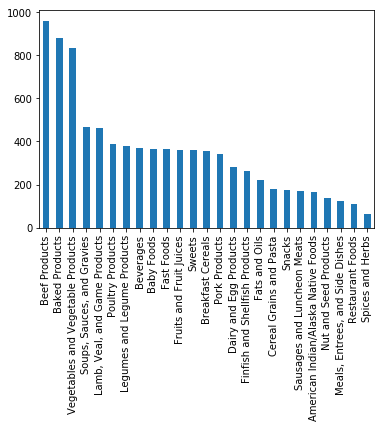

In [8]:
vc_food = combined['FoodGroupDesc'].value_counts()
vc_food.plot(kind='bar')

### Q4(c): Draw the same plot as above, but only for foods containing `Chicken` or `chicken` in the `LongDesc` field.

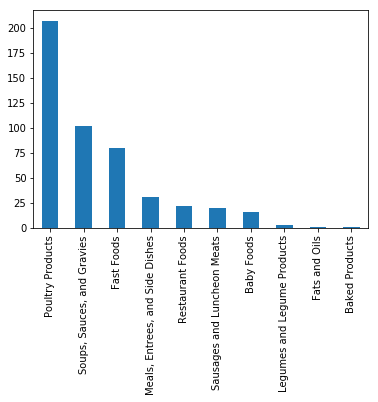

In [9]:
import re
def find_chick(description):
    s = 'chicken'
    result = re.findall(s,description.lower())
    return(len(result)>0)
mask = combined['LongDesc'].map(find_chick)
vc_food_chicken = combined[mask]['FoodGroupDesc'].value_counts()
vc_food_chicken.plot(kind='bar')

### Q4(d): Most common company names

The `LongDesc` field sometimes contains company names as part of the food name: e.g. "`KEEBLER, Vanilla Wafers`", or "`Cereals, QUAKER, Whole Wheat Natural Cereal, dry`", or "`PEPPERIDGE FARM, Goldfish, Baked Snack Cracker`". Let us define a company name to be the _first_ sequence of characters in `LongDesc` that
* starts with an upper-case character,
* has only upper-case characters or spaces or apostrophes (') in the middle,
* and ends with either a space or a comma.

So, for example:

LongDesc | CompanyName 
--- | ---
KEEBLER, Vanilla Wafers | KEEBLER,
KEEBLER, ANIMALS, Frosted Cookies | KEEBLER,
Cereals, QUAKER, Whole Wheat Natural Cereal, dry | QUAKER,
PEPPERIDGE FARM, Goldfish, Baked Snack Cracker | PEPPERIDGE FARM,
CAMPBELL'S, Cheddar Cheese Soup, condensed | CAMPBELL'S,

Notice that:
* in "`KEEBLER, ANIMALS, Frosted Cookies`", both the strings "`KEEBLER,`" and "`ANIMALS,`" satisfy the conditions above, but only the _first_ string (`KEEBLER,`) became the company name,
* "`CAMPBELL'S` " (with an ending space) and "`CAMPBELL'S,`" (with an ending comma) are considered different companies.

Attach a `CompanyName` column to the `combined` dataframe. If the `LongDesc` has no company name in it, return `np.nan`.

Then, plot the 10 most frequent company names (`CompanyName` along the x-axis, frequency of the company on the y-axis).

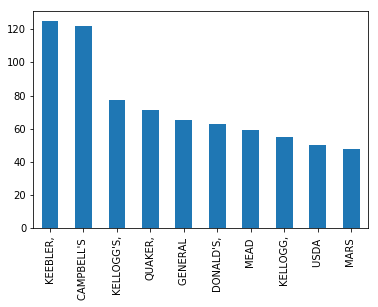

In [10]:
import numpy as np
def find_company(description):
    list = re.findall("[A-Z]+[A-Z'\fs]+[\s,]",description)
    if len(list)>0:
        return list[0]
    else:
        return np.nan
combined['CompanyName'] = combined['LongDesc'].map(find_company)
vc_company = combined['CompanyName'].value_counts()
vc_company[:10].plot(kind='bar')

### Q4(e): First non-company word

For each food, find the first word (call it `firstword`) in its `LongDesc` that is not all uppercase; this is typically something other than a company name. Here, the words of `LongDesc` are just strings separated by whitespace. For example:

LongDesc | firstword
--- | ---
Butter, salted | Butter,
Cheese, camembert | Cheese,
McDONALD'S, Hamburger | McDONALD'S,  `(because of the lowercase c)`
KEEBLER, Vanilla Wafers | Vanilla
KEEBLER, ANIMALS, Cookies | Cookies

Then, for each `FoodGroupDesc`, figure out the most common `firstword` for foods in that group.

_Reminder_: For a string s, you can get it capitalized via s.upper(), and get it in lowercase via s.lower().

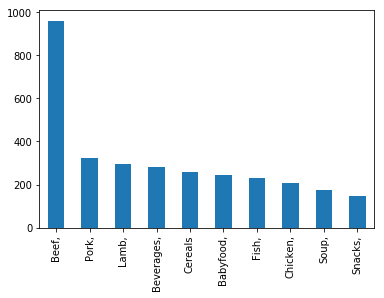

In [11]:
def find_first(description):
    list = description.split(' ')
    for item in list:
        if item.upper() == item:
            continue
        else:
            return item
combined['firstword'] = combined['LongDesc'].map(find_first)
vc_first = combined['firstword'].value_counts()
vc_first[:10].plot(kind='bar')

### Q4(f): Homogeneous food groups

Suppose we want to find food groups where all foods in the group have roughly similar values for `ProFactor`, `FatFactor`, and `CHOfactor`. Let us define the `relativeRange` of `ProFactor` among all foods in a food group (say, `Baby Foods`) as

    relativeRange(ProFactor) = (max(ProFactor) - min(ProFactor)) / average(ProFactor)

where the `max`, `min`, and `average` are taken over all foods under the `Baby Foods` group. The relative range for `FatFactor` and `CHOfactor` can be defined accordingly.

Figure out all food groups that:
* contain at least 50 foods,
* have a ProFactor relativeRange that is less than the median ProFactor relativeRange among all food groups,
* and similarly, a FatFactor relativeRange and a CHOfactor relativeRange that are less than their medians among all food groups.

Note: We want _all_ the above conditions to hold.

Note 2: Please output the `FoodGroupDesc` instead of just the `FoodGroup` category code.

In [12]:
food_50 = vc_food[vc_food >= 50]
def get_range(pro):
    return (pro.max() - pro.min())/pro.mean()
rel_range = combined.groupby(['FoodGroupDesc'])[['ProFactor','FatFactor','CHOfactor']].agg(get_range)
mask1 = rel_range['ProFactor']<rel_range['ProFactor'].median()
mask2 = rel_range['FatFactor']<rel_range['FatFactor'].median()
rel_range[rel_range.index.isin(food_50.index)][mask1][mask2]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,ProFactor,FatFactor,CHOfactor
FoodGroupDesc,,,
American Indian/Alaska Native Foods,0.000000,0.000000,0.000000
Beef Products,0.063264,0.004435,0.061991
Dairy and Egg Products,0.065385,0.026064,0.070251
Finfish and Shellfish Products,0.185355,0.019968,0.112388
"Lamb, Veal, and Game Products",0.000000,0.000000,0.061967
Nut and Seed Products,0.034564,0.000000,0.071330
Pork Products,0.063357,0.002217,0.061916
Poultry Products,0.093711,0.002217,0.103317
Restaurant Foods,0.000000,0.000000,0.000000


In [13]:
rel_range.index

Index([u'American Indian/Alaska Native Foods', u'Baby Foods',
       u'Baked Products', u'Beef Products', u'Beverages', u'Breakfast Cereals',
       u'Cereal Grains and Pasta', u'Dairy and Egg Products', u'Fast Foods',
       u'Fats and Oils', u'Finfish and Shellfish Products',
       u'Fruits and Fruit Juices', u'Lamb, Veal, and Game Products',
       u'Legumes and Legume Products', u'Meals, Entrees, and Side Dishes',
       u'Nut and Seed Products', u'Pork Products', u'Poultry Products',
       u'Restaurant Foods', u'Sausages and Luncheon Meats', u'Snacks',
       u'Soups, Sauces, and Gravies', u'Spices and Herbs', u'Sweets',
       u'Vegetables and Vegetable Products'],
      dtype='object', name=u'FoodGroupDesc')

### Q4(g): Predicting the ProFactor

Try to predict the value of `ProFactor` using `FatFactor`, `CHOfactor`, and the categories given by `FoodGroupDesc`. Comment on 
1. the goodness of fit, 
2. the factors that are statistically significant at the 0.005 p-value level, and
3. how the presence or absence of these statistically significant factors affects `ProFactor` prediction.

In [14]:
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('ProFactor ~ FatFactor + CHOfactor + C(FoodGroupDesc)', data=combined, return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()

print 'R-squared =', result.rsquared
print
print result.pvalues[result.pvalues<0.005]
print
print result.params[result.pvalues[result.pvalues<0.005].index]

R-squared = 0.853140236893

C(FoodGroupDesc)[T.Snacks]                                5.732494e-04
C(FoodGroupDesc)[T.Spices and Herbs]                      1.718172e-04
C(FoodGroupDesc)[T.Vegetables and Vegetable Products]     1.953200e-07
FatFactor                                                6.556138e-209
CHOfactor                                                2.544911e-161
dtype: float64

C(FoodGroupDesc)[T.Snacks]                              -0.893985
C(FoodGroupDesc)[T.Spices and Herbs]                    -0.979146
C(FoodGroupDesc)[T.Vegetables and Vegetable Products]   -1.344543
FatFactor                                                0.285582
CHOfactor                                                0.572765
dtype: float64


/usr/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Q4(h): Food clusters

Create a clean dataset by selecting the `FoodGroupDesc`, `ProFactor`, `FatFactor`, and `CHOfactor` columns from the `combined` DataFrame and dropping any rows with missing values. Now, use k-means to cluster the foods based on all three factors, using as many clusters as there are food groups. Finally, figure out the groups for which 90% or more of the foods in that group belong to a single cluster.

### Q4(i): Common types of cooking

Quite often, the `LongDesc` of a food specifies how it is to be cooked or used, e.g., _Butter, whipped, with salt_. Let's assume the part of the `LongDesc` after the **last comma** specifies the type of cooking. Attach a `cooking_style` column to the `combined` DataFrame. For example:

LongDesc | cooking_style
--- | ---
Egg, duck, whole, fresh, raw | raw
Butter, without salt | without salt
Cheese, feta | feta

Clearly, this is not always accurate, so we will refine this. Find the 10 most common `cooking_style` values, and change all the remainder to `Other`. So, if `raw` and `without salt` are in the top 10 but `feta` isn't, we should get

LongDesc | cooking_style
--- | ---
Egg, duck, whole, fresh, raw | raw
Butter, without salt | without salt
Cheese, feta | Other

In [15]:
def get_style(description):
    list = description.split(',')
    return list[-1]
combined['cooking_style'] = combined['LongDesc'].map(get_style)
vc_style = combined['cooking_style'].value_counts()
vc_style10 = vc_style[:10]

def get_top(style):
    if style in vc_style10.index:
        return style
    else:
        return 'Other'

combined['cooking_style'] = combined['cooking_style'].map(get_top)
combined['cooking_style'].value_counts()

Other                  5669
 raw                   1277
 roasted                349
 braised                246
 without salt           237
 with salt              234
 unprepared             196
 broiled                179
 grilled                154
 cooked                 136
 solids and liquids     112
Name: cooking_style, dtype: int64

### Q4(j): Common types of cooking (continued)

Using the results of the previous question, build a table whose index is these top 10 cooking types (plus `Other`), the columns are the various `FoodGroupDesc`, and the values are the number of times foods from the same FoodGroup can be cooked in that style.

Then, normalize each `FoodGroupDesc` column by the overall frequencies of the various cooking types. Finally, pick the most common `cooking_style` for each `FoodGroupDesc` (most common after normalization).

In [16]:
group_style = pd.crosstab(combined['cooking_style'],combined['FoodGroupDesc'],)
Frequency = combined['cooking_style'].value_counts()
def norm(group):
    return group*1.0/Frequency
group_style_norm = group_style.apply(norm)
group_style_norm.idxmax()

FoodGroupDesc
American Indian/Alaska Native Foods                  Other
Baby Foods                                           Other
Baked Products                                       Other
Beef Products                                      grilled
Beverages                                            Other
Breakfast Cereals                             without salt
Cereal Grains and Pasta                             cooked
Dairy and Egg Products                               Other
Fast Foods                                          cooked
Fats and Oils                                    with salt
Finfish and Shellfish Products                         raw
Fruits and Fruit Juices                 solids and liquids
Lamb, Veal, and Game Products                      braised
Legumes and Legume Products                     unprepared
Meals, Entrees, and Side Dishes                 unprepared
Nut and Seed Products                         without salt
Pork Products                             

In [20]:
group_style

FoodGroupDesc,American Indian/Alaska Native Foods,Baby Foods,Baked Products,Beef Products,Beverages,Breakfast Cereals,Cereal Grains and Pasta,Dairy and Egg Products,Fast Foods,Fats and Oils,...,Nut and Seed Products,Pork Products,Poultry Products,Restaurant Foods,Sausages and Luncheon Meats,Snacks,"Soups, Sauces, and Gravies",Spices and Herbs,Sweets,Vegetables and Vegetable Products
cooking_style,,,,,,,,,,,,,,,,,,,,,
braised,0,0,0,122,0,0,0,0,0,0,...,0,34,13,0,0,0,0,0,0,0
broiled,0,0,0,102,0,0,0,0,0,0,...,0,31,8,0,0,0,0,0,0,0
cooked,0,0,0,22,0,0,36,0,13,0,...,0,10,9,0,13,0,0,0,0,5
grilled,0,0,0,139,0,0,0,0,0,0,...,0,0,2,0,2,0,0,0,0,2
raw,0,0,0,410,0,0,6,4,0,0,...,11,82,142,0,4,0,0,0,0,198
roasted,0,0,0,108,0,0,0,0,0,0,...,4,77,84,0,0,0,0,0,0,0
solids and liquids,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
unprepared,0,0,0,0,0,1,0,0,8,0,...,0,3,0,0,3,0,0,0,0,63
with salt,0,0,0,0,0,8,2,1,0,15,...,0,0,0,0,0,0,1,0,0,166


---
## Q5 (10 points) An online advertising experiment

Suppose we want to figure out if online advertising works for a brick-and-mortar store (say, `Macy's`). However, just tracking online advertising against online sales won't work; after all, a customer could see an ad online but buy the product at a store. So, let's say we could set up the following experiment.

Suppose we could connect 1 million `Macy's` store customers with their Google accounts (e.g., via customers' publicly released google email addresses). Now, whenever any of these customers log in to Google, we show them a `Macy's` ad. At the end of couple of weeks, we have two groups of customers: Group A, who saw online ads, and Group B, who didn't. Now, we check if Group A customers bought more stuff at `Macy's` than Group B customers (we account for both online and store-based sales).

If Group A bought more stuff, we say that online advertising works.

Is this a reasonable assertion? If yes, explain why. If not, explain why not, and how you would modify this experiment to make it work.